In [9]:
#Primeira parte

import math

import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import odeint

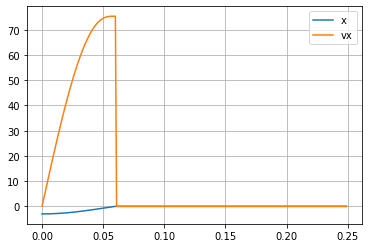

In [11]:
m = 0.02275 # massa da flecha em kg

k = 10 #constante elastica



a = 1 # tamanho do arco em metros

 

def arco (s,t):
    #delimita o espaço inicial de lançamento no eixo X
    x = s[0]
    
    #delimita a velocidade inicial no eixo x
    vx = s[1]
    
    #resistencia do ar
    fr_ar = 0
    
    #calcula a resultante no eixo x
    rx = 2*k*(((x**2+(a**2/4))**(1/2))-(a/2))*(-x)/(x**2+(a**2/4))**(1/2) - (1/2 * ro * Cx  * A *(v**2))
    
    # demonstra que a derivada do espaço no eixo X é igual a velocidade no mesmo eixo
    dxdt = vx
    
    # demonstra que a derivada da velocidade no eixo X é igual a aceleração no mesmo eixo
    dvxdt = rx/m  
    
    # Colocando um referencial como positivo para a direita no Eixo X, toda puchada da corda implica em um
    # deslocamento negativo no eixo X
    # Quando X for maior que zero, o movimento sera impossibilitado
    if x >= 0:
        
        # zera a velocidade
        dxdt = 0
        
        # zerando assim a aceleração
        dvxdt = 0

  

    return dxdt, dvxdt

 
t0 = 0
tf = 1/4
delta_t = 1e-3
tempo = np.arange(t0, tf, delta_t)
#tempo = np.arange(0,1/4,1e-3)

ci = [-3,0]

solucao = odeint(arco,ci,tempo)

plt.plot(tempo,solucao[:,0],label='x')

plt.plot(tempo,solucao[:,1],label='vx')

plt.legend()

plt.grid(True)

plt.show()

#------------------------- 

## Validação

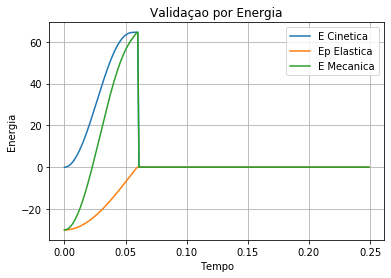

In [12]:
Ec_lista2 = []
Ep_gravit = []
Ep_elast_lis  = []
Em_lista = []

for valores in range(0,len(tempo)):

    espaco_x = solucao[:,0][valores]
    #espaco_y = solucao[:,1][valores]


    vx = solucao[:,1][valores]
    #vy = solucao[:,3][valores]

    v_quadrado = vx**2
    
    Ec2 = (m * v_quadrado)/ 2
    Ec_lista2.append(Ec2)
    
    #Ep = m * espaco_y * g
    #Ep_gravit.append(Ep)
    
    Ep_elast  = k * solucao[:,0][valores]
    Ep_elast_lis.append(Ep_elast)
    
    
    Em = Ec2 + Ep_elast
    Em_lista.append(Em)

plt.grid(True)
plt.title("Validaçao por Energia")
plt.plot(tempo,Ec_lista2, label = "E Cinetica")
#plt.plot(tempo,Ep_gravit, label = "E Potencial Grav")
plt.plot(tempo,Ep_elast_lis, label = "Ep Elastica")
plt.plot(tempo,Em_lista, label = "E Mecanica")
plt.xlabel("Tempo")
plt.ylabel("Energia")
plt.legend()
plt.show()

C:\Users\rafae\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


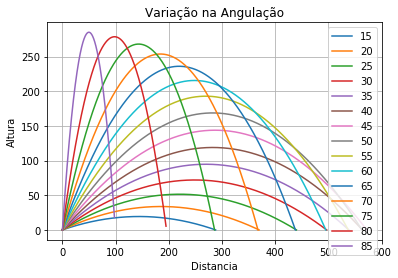

In [4]:
#Variação na Angulação

top_vel = max(solucao[:,1])

   

raio_flecha = 0.0008 #m

a = math.pi*raio_flecha**2  #m²

pa = 1.225

cd = 0.47

g = 9.81 # m/s²

alpha = math.radians(45) ######ISSO VAI VIRAR UMA LISTA######

 

def trajetoriaf(lista,t):

    x = lista[0]

    y = lista[1]

    Vx = lista[2]

    Vy = lista[3]

    dxdt = Vx

    dydt = Vy

    dVxdt = -(1/m)*(1/2)*pa*cd*a*(Vx**2+Vy**2)*(Vx/((Vx**2+Vy**2)**(1/2)))

    dVydt = -(1/m)*(1/2)*pa*cd*a*(Vx**2+Vy**2)*(Vy/((Vx**2+Vy**2)**(1/2)))-g

    if Vy < 0 and y <= 0:

        dxdt = 0

        dydt = 0

        dVxdt = 0

        dVydt = 0                

    return dxdt, dydt, dVxdt, dVydt

 

lista_alpha = np.arange(15,90,5)

z = 0

lt = np.arange(0,15,1e-4)

lista_dist = []

for i in lista_alpha:

    ci = [0,0,math.cos(math.radians(i))*top_vel,math.sin(math.radians(i))*top_vel]   

    solucao = odeint(trajetoriaf,ci,lt)

    plt.plot(solucao[:,0],solucao[:,1],label=lista_alpha[z])

    lista_dist.append(max(solucao[:,0]))

    z = z+1

plt.legend()
plt.title("Variação na Angulação")
plt.xlabel("Distancia")
plt.ylabel("Altura")
plt.grid(True)

plt.show()

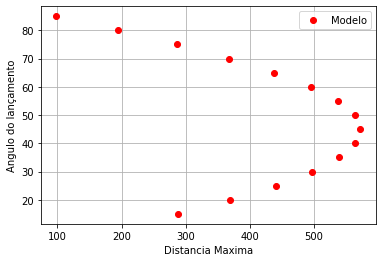

In [5]:
#segunda parte

plt.plot(lista_dist,lista_alpha,'ro',label='Modelo')

plt.xlabel('Distancia Maxima')

plt.ylabel('Angulo do lançamento')

plt.legend()

plt.grid(True)

plt.show()

# Validação Lançamento Obliquo
* Ec = ( m*v² )/2
* Epg = m * g * h

* Em = Ec + Epg

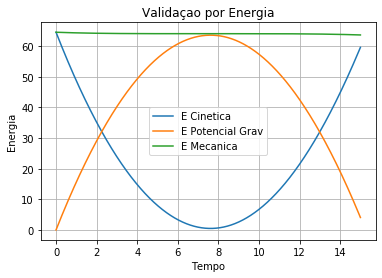

In [8]:
Ec_lista2 = []
Ep_gravit = []
Em_lista = []

for valores in range(0,len(lt)):

    espaco_x = solucao[:,0][valores]
    espaco_y = solucao[:,1][valores]


    vx = solucao[:,2][valores]
    vy = solucao[:,3][valores]

    v_quadrado = vx**2 + vy**2
    
    Ec2 = (m * v_quadrado)/ 2
    Ec_lista2.append(Ec2)
    
    Ep = m * espaco_y * g
    Ep_gravit.append(Ep)
    
    Em = Ep + Ec2
    Em_lista.append(Em)

plt.grid(True)
plt.title("Validaçao por Energia")
plt.plot(lt,Ec_lista2, label = "E Cinetica")
plt.plot(lt,Ep_gravit, label = "E Potencial Grav")
plt.plot(lt,Em_lista, label = "E Mecanica")
plt.xlabel("Tempo")
plt.ylabel("Energia")
plt.legend()
plt.show()